DATASETS to Upload:
POKEMON DATASET

#**Extreme Value Analysis Using Univariate Method**

In [1]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [2]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [3]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Extract feature and target arrays
X, y = diamonds.drop("carat", axis=1), diamonds["carat"]
# Select categorical column names
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Encode categoricals
X.loc[:, cats] = OrdinalEncoder().fit_transform(X[cats])

In [4]:
y.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

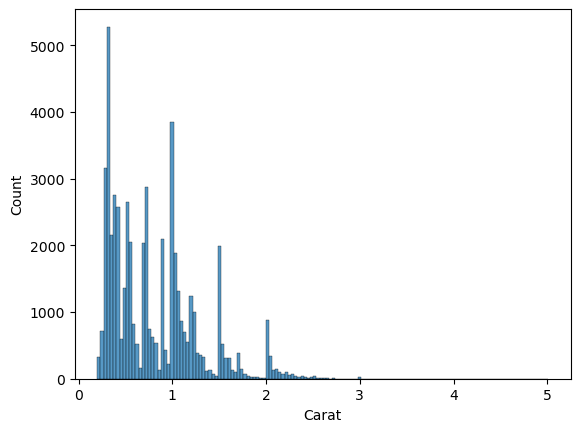

In [5]:
import matplotlib.pyplot as plt
sns.histplot(y)

plt.xlabel("Carat");

In [6]:
X.drop(cats, axis=1).describe()

depth         table         price             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean      61.749405     57.457184   3932.799722      5.731157      5.734526   
std        1.432621      2.234491   3989.439738      1.121761      1.142135   
min       43.000000     43.000000    326.000000      0.000000      0.000000   
25%       61.000000     56.000000    950.000000      4.710000      4.720000   
50%       61.800000     57.000000   2401.000000      5.700000      5.710000   
75%       62.500000     59.000000   5324.250000      6.540000      6.540000   
max       79.000000     95.000000  18823.000000     10.740000     58.900000   

                  z  
count  53940.000000  
mean       3.538734  
std        0.705699  
min        0.000000  
25%        2.910000  
50%        3.530000  
75%        4.040000  
max       31.800000

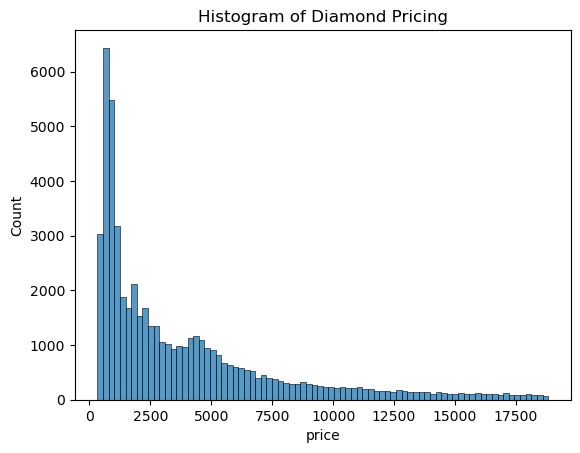

In [7]:
sns.histplot(X["price"])

plt.title("Histogram of Diamond Pricing")
plt.xlabel("price");

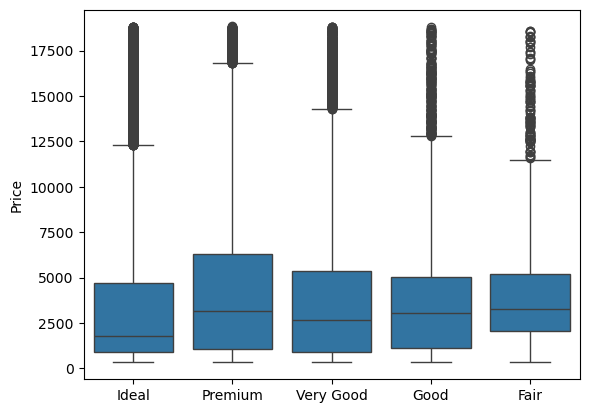

In [8]:
sns.boxplot(x="cut", y="price", data=diamonds, whis=2)

plt.xlabel("")
plt.ylabel("Price");

In [9]:
from scipy.stats import zscore

zscore(y).abs()[:5]

0    1.198168
1    1.240361
2    1.198168
3    1.071587
4    1.029394
Name: carat, dtype: float64

In [10]:
from scipy.stats import zscore

# Calculate the abs of zscore and filter above 3
is_outlier = zscore(y).abs() > 3
outliers_y = y[is_outlier]

num_outliers = len(outliers_y)
print(f"The number of outliers: {num_outliers}")
print(f"Percentage of outliers: {num_outliers / len(y):.3f}")

The number of outliers: 439
Percentage of outliers: 0.008


In [11]:
# Find the median
median_y = y.median()

# Find the abs value of differences between the median
abs_diffs = (y - median_y).abs()
# Take the median of differences
mad = abs_diffs.median()

mad

0.32000000000000006

In [12]:
from scipy.stats import median_abs_deviation

median_abs_deviation(y)

0.32000000000000006

In [13]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [14]:
from pyod.models.mad import MAD

# Reshape the target to make it 2D
y_2d = y.values.reshape(-1, 1)
# Fit to the target
mad = MAD().fit(y_2d)

# Extract the inlier/outlier labels
labels = mad.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
outliers_y_mad = y[labels == 1]

num_outliers = len(outliers_y_mad)
print(f"The number of outliers: {num_outliers}")
print(f"Percentage of outliers: {num_outliers / len(y):.3f}")

The number of outliers: 222
Percentage of outliers: 0.004


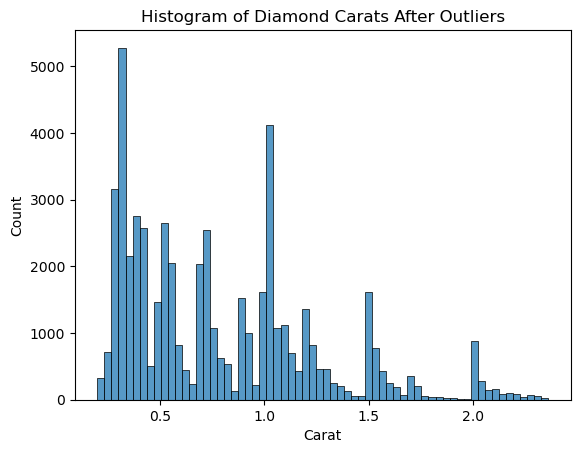

In [16]:
# Filter for inliers, marked as 0s
inliers = y[labels == 0]

sns.histplot(inliers)

plt.title("Histogram of Diamond Carats After Outliers")
plt.xlabel("Carat");

In [17]:
def tukey_method(data, threshold=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers_indices = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers_indices

In [18]:
list_to_label = tukey_method(y)
len(list_to_label)

1889

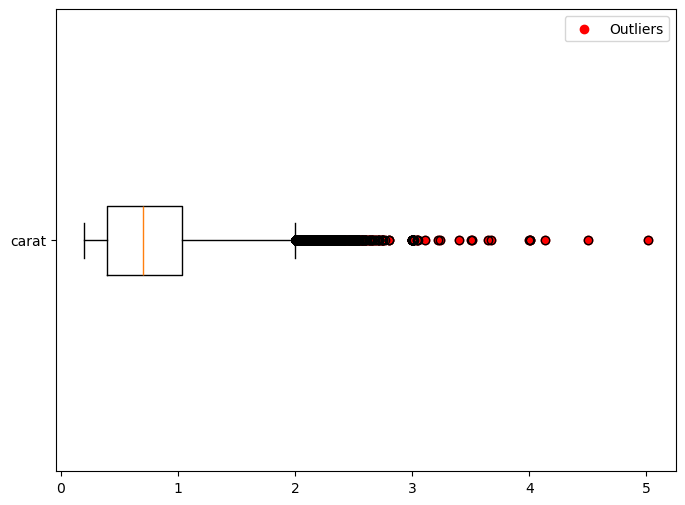

In [19]:
plt.figure(figsize=(8, 6))
plt.boxplot(y, vert=False, labels=['carat'])
plt.scatter(y[list_to_label], [1] * len(list_to_label), color='red', label='Outliers')
plt.legend()
plt.show()

In [20]:
print("Indexes of Outliers:", list_to_label)
print("Values of Outliers:", y[list_to_label])

Indexes of Outliers: [12246 13002 13118 ... 27744 27746 27749]
Values of Outliers: 12246    2.06
13002    2.14
13118    2.15
13757    2.22
13991    2.01
         ... 
27741    2.15
27742    2.04
27744    2.29
27746    2.07
27749    2.29
Name: carat, Length: 1889, dtype: float64


In [21]:
import pandas as pd
df = pd.DataFrame(diamonds)
odf = pd.DataFrame(list_to_label, columns = ['index'])

In [22]:
odf['outliers_status'] = 'yes'
odf

index outliers_status
0     12246             yes
1     13002             yes
2     13118             yes
3     13757             yes
4     13991             yes
...     ...             ...
1884  27741             yes
1885  27742             yes
1886  27744             yes
1887  27746             yes
1888  27749             yes

[1889 rows x 2 columns]

In [23]:
df['index'] = df.index
df

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       index  
0          0  
1          1  
2          2  
3          3  
4          4  
...      ...  
53935  53935  
53936  53936  
53937  53937  
53938  53938  
53939  53939  

[53940 rows x 11 columns]

In [24]:
df = df.join(odf.set_index('index'), on='index')

In [25]:
df[df['outliers_status'] == 'yes']

carat      cut color clarity  depth  table  price     x     y     z  \
12246   2.06  Premium     J      I1   61.2   58.0   5203  8.10  8.07  4.95   
13002   2.14     Fair     J      I1   69.4   57.0   5405  7.74  7.70  5.36   
13118   2.15     Fair     J      I1   65.5   57.0   5430  8.01  7.95  5.23   
13757   2.22     Fair     J      I1   66.7   56.0   5607  8.04  8.02  5.36   
13991   2.01     Fair     I      I1   67.4   58.0   5696  7.71  7.64  5.17   
...      ...      ...   ...     ...    ...    ...    ...   ...   ...   ...   
27741   2.15    Ideal     G     SI2   62.6   54.0  18791  8.29  8.35  5.21   
27742   2.04  Premium     H     SI1   58.1   60.0  18795  8.37  8.28  4.84   
27744   2.29  Premium     I     SI1   61.8   59.0  18797  8.52  8.45  5.24   
27746   2.07    Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11   
27749   2.29  Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16   

       index outliers_status  
12246  12246             yes  
13002  13002             yes  
13118  13118             yes  
13757  13757             yes  
13991  13991             yes  
...      ...             ...  
27741  27741             yes  
27742  27742             yes  
27744  27744             yes  
27746  27746             yes  
27749  27749             yes  

[1889 rows x 12 columns]

In [26]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


#**Multivariate Analysis**

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 41 columns]

In [28]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

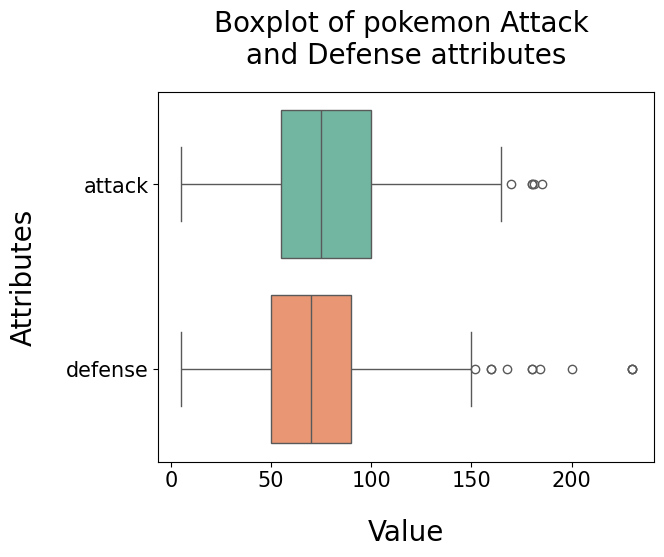

In [29]:
#create the plot
ax = sns.boxplot(data = pokemon[["attack", "defense"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of pokemon Attack \nand Defense attributes", fontsize = 20,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

In [30]:
def IQR_bounds(dataframe, column_name, multiple):
    """Extract the upper and lower bound for outlier detection using IQR

    Input:
        dataframe: Dataframe you want to extract the upper and lower bound from
        column_name: column name you want to extract upper and lower bound for
        multiple: The multiple to use to extract this

    Output:
        lower_bound = lower bound for column
        upper_bound = upper bound for column"""

    #extract the quantiles for the column
    lower_quantile = dataframe[column_name].quantile(0.25)
    upper_quantile = dataframe[column_name].quantile(0.75)
    #cauclat IQR
    IQR = upper_quantile - lower_quantile

    #extract lower and upper bound
    lower_bound = lower_quantile - multiple * IQR
    upper_bound = upper_quantile + multiple * IQR

    #retrun these values
    return lower_bound, upper_bound


In [31]:
#set the columns we want
columns = ["attack", "defense"]
#create a dictionary to store the bounds
column_bounds = {}
#iteratre over each column to extract bounds
for column in columns:
    #extract normal and extreme bounds
    lower_bound, upper_bound =  IQR_bounds(pokemon, column, 1.5)
    #send them to the dictionary
    column_bounds[column] = [lower_bound, upper_bound]
#create the normal dataframe
pokemon_IQR_AD = pokemon[(pokemon["attack"] < column_bounds["attack"][0]) |
                         (pokemon["attack"] > column_bounds["attack"][1]) |
                         (pokemon["defense"] < column_bounds["defense"][0]) |
                         (pokemon["defense"] > column_bounds["defense"][1])
                        ]

In [32]:
pokemon_IQR_AD.shape

(15, 41)

##***Isolation Forest***

In [33]:
from sklearn.ensemble import IsolationForest
#create the method instance
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(pokemon[["attack", "defense"]])
#extract outliers from the data
pokemon["iso_forest_outliers"] = preds
pokemon["iso_forest_outliers"] = pokemon["iso_forest_outliers"].astype(str)
#extract the scores from the data in terms of strength of outlier
pokemon["iso_forest_scores"] = isf.decision_function(pokemon[["attack", "defense"]])
#print how many outliers the data suggests
print(pokemon["iso_forest_outliers"].value_counts())

iso_forest_outliers
1     785
-1     16
Name: count, dtype: int64


In [34]:
#this plot will be repeated so it is better to create a function
def scatter_plot(dataframe, x, y, color, title, hover_name):
    """Create a plotly express scatter plot with x and y values with a colour

    Input:
        dataframe: Dataframe containing columns for x, y, colour and hover_name data
        x: The column to go on the x axis
        y: Column name to go on the y axis
        color: Column name to specify colour
        title: Title for plot
        hover_name: column name for hover

    Returns:
        Scatter plot figure
    """
    #create the base scatter plot
    fig = px.scatter(dataframe, x = x, y=y,
                    color = color,
                     hover_name = hover_name)
    #set the layout conditions
    fig.update_layout(title = title,
                     title_x = 0.5)
    #show the figure
    fig.show()

#create scatter plot
scatter_plot(pokemon, "attack", "defense", "iso_forest_outliers", "Isolation Forest Outlier Detection","name")

In [35]:
scatter_plot(pokemon, "attack", "defense", "iso_forest_scores",
             "Isolation Forest Outlier Detection Scores",
            "name")

<Axes: xlabel='iso_forest_scores', ylabel='Count'>

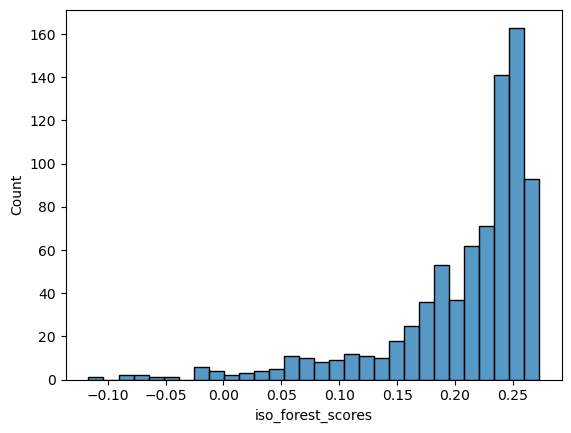

In [36]:
sns.histplot(pokemon['iso_forest_scores'])

##***Local Outlier Factor***

In [37]:
#import the algorithm
from sklearn.neighbors import LocalOutlierFactor
#initialise the algorithm
lof = LocalOutlierFactor(n_neighbors = 20)
#fit it to the training data, since we don't use it for novelty than this is fine
y_pred = lof.fit_predict(pokemon[["attack", "defense"]])
#extract the predictions as strings
pokemon["lof_outliers"] = y_pred.astype(str)
#print the number of outliers relative to non-outliers
print(pokemon["lof_outliers"].value_counts())
#extract the outlier scores
pokemon["lof_scores"] = lof.negative_outlier_factor_


lof_outliers
1     767
-1     34
Name: count, dtype: int64


In [38]:
scatter_plot(pokemon, "attack", "defense", "lof_outliers", "Local Outlier Factor Detection","name")

In [39]:
scatter_plot(pokemon, "attack", "defense", "lof_scores",
             "Local Outlier Factor Detection Scores",
            "name")

In [40]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   abilities            801 non-null    object 
 1   against_bug          801 non-null    float64
 2   against_dark         801 non-null    float64
 3   against_dragon       801 non-null    float64
 4   against_electric     801 non-null    float64
 5   against_fairy        801 non-null    float64
 6   against_fight        801 non-null    float64
 7   against_fire         801 non-null    float64
 8   against_flying       801 non-null    float64
 9   against_ghost        801 non-null    float64
 10  against_grass        801 non-null    float64
 11  against_ground       801 non-null    float64
 12  against_ice          801 non-null    float64
 13  against_normal       801 non-null    float64
 14  against_poison       801 non-null    float64
 15  against_psychic      801 non-null    flo

In [41]:
pokemon['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [42]:
pokemon_num = pokemon[['attack', 'defense', 'capture_rate', 'hp', 'speed', 'height_m', 'weight_kg', 'sp_attack', 'sp_defense', 'iso_forest_outliers', 'iso_forest_scores']]

In [43]:
pokemon_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   attack               801 non-null    int64  
 1   defense              801 non-null    int64  
 2   capture_rate         801 non-null    object 
 3   hp                   801 non-null    int64  
 4   speed                801 non-null    int64  
 5   height_m             781 non-null    float64
 6   weight_kg            781 non-null    float64
 7   sp_attack            801 non-null    int64  
 8   sp_defense           801 non-null    int64  
 9   iso_forest_outliers  801 non-null    object 
 10  iso_forest_scores    801 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 69.0+ KB


In [44]:
pokemon_num.select_dtypes(include = 'number').fillna(pokemon_num.select_dtypes(include = 'number').mean(), inplace=True)

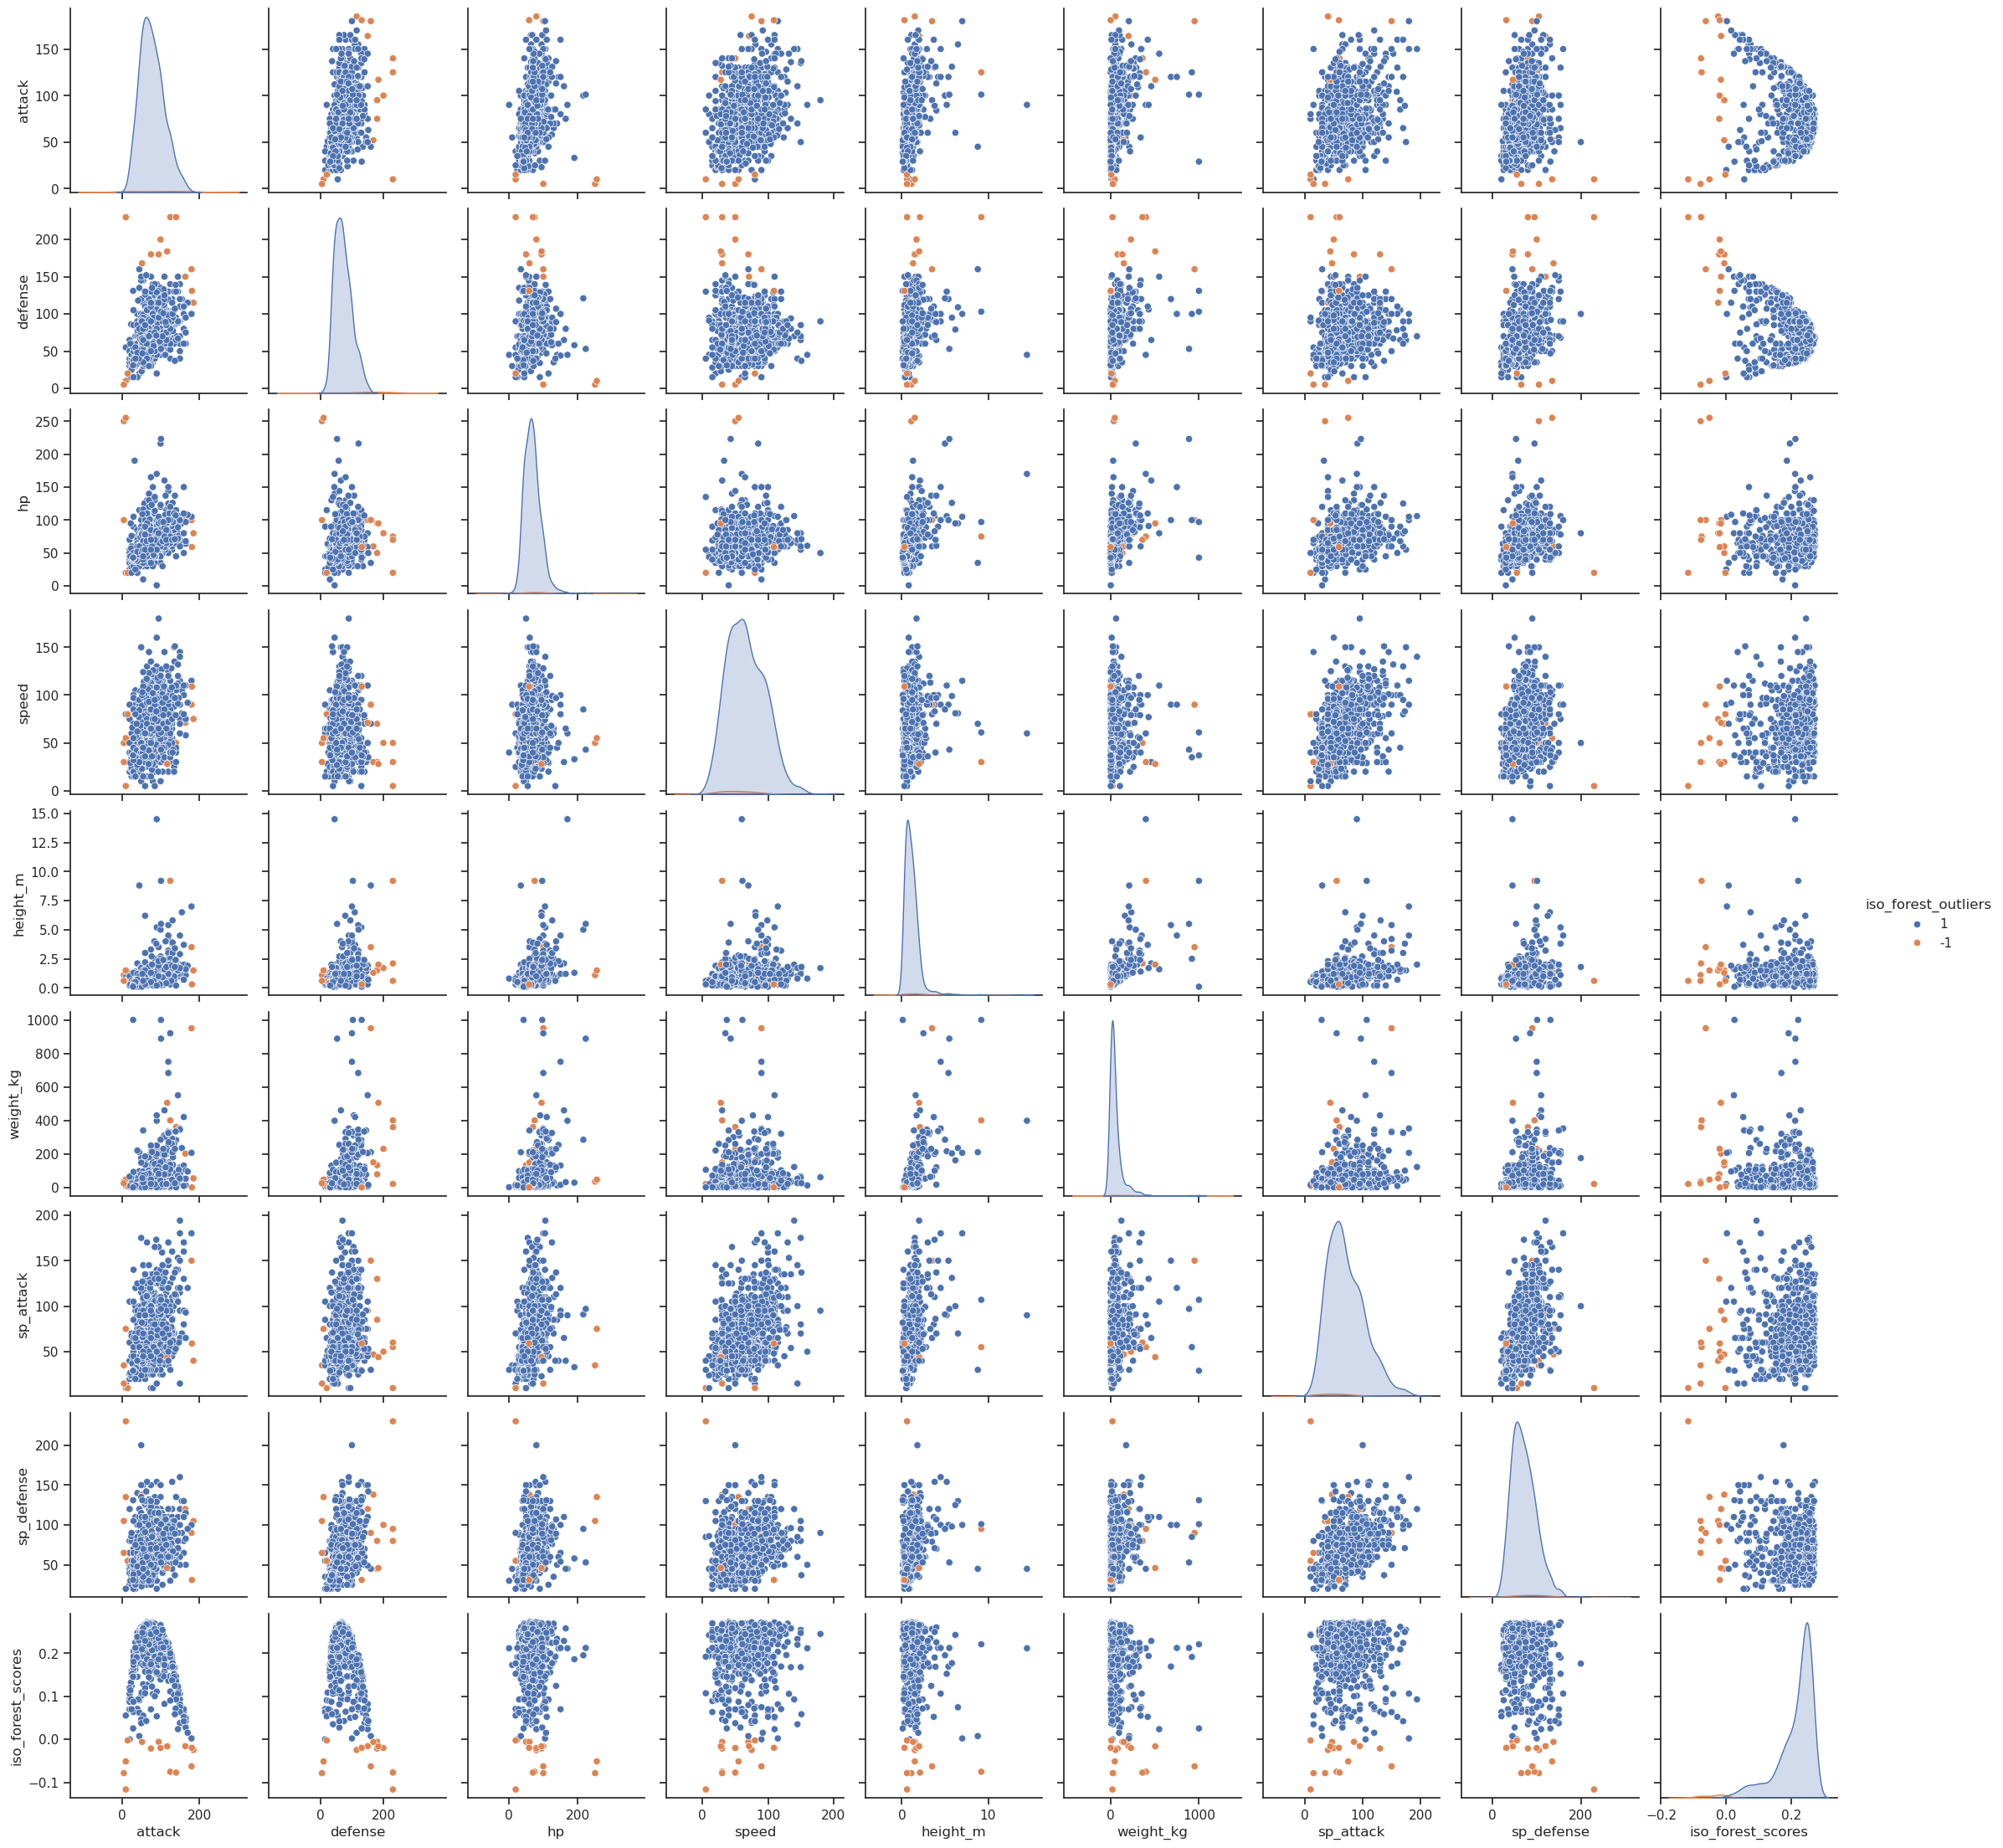

In [45]:
sns.set_theme(style="ticks")
sns.pairplot(pokemon_num, hue='iso_forest_outliers')

##***DBScans***

In [46]:
from sklearn.cluster import DBSCAN

#initiate the algorithm
#set the distance to 20, and min_samples as 5
outlier_detection = DBSCAN(eps = 20, metric = "euclidean", min_samples = 10, n_jobs = -1)

#fit_predict the algorithm to the existing data
clusters = outlier_detection.fit_predict(pokemon[["attack", "defense"]])

#extract the labels from the algorithm
pokemon["dbscan_outliers"] = clusters

#label all others as inliers
pokemon["dbscan_outliers"] = pokemon["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))

#print the vaue counts
print(pokemon["dbscan_outliers"].value_counts())

dbscan_outliers
1     787
-1     14
Name: count, dtype: int64


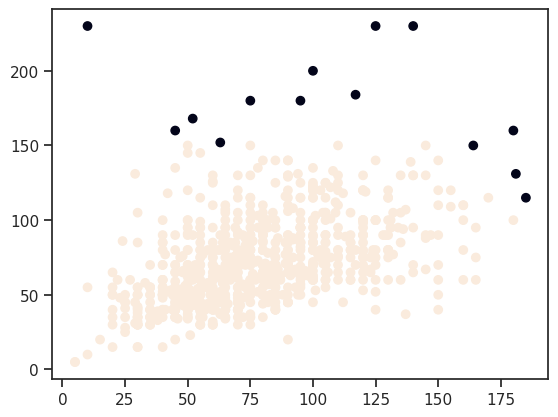

In [47]:
colors = outlier_detection.labels_
plt.scatter(pokemon["attack"], pokemon["defense"], c = colors)